In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
a = loadtxt('avals.txt')
b = loadtxt('bvals.txt')
runge = loadtxt('Runge.txt')
p6 = loadtxt('p6_uni.txt')
p24 = loadtxt('p24_uni.txt')
p6Cheb = loadtxt('p6_Cheb.txt')
p24Cheb = loadtxt('p24_Cheb.txt')

# Comparison between Uniform and Chebyshov Points

The first graph it the actual graph of the function $$f(x,y) = \frac{1}{1 + x^2 + y^2}$$ over the grid $(x, y) \in [-4,4] \times [-4,4]$ This graph was created by finding $f(a_i, b_j)$ in $a$ and $b$. Both $a$ and $b$ are vectors of 201 and 101 equally spaced points over $[-4,4]$ respectfully

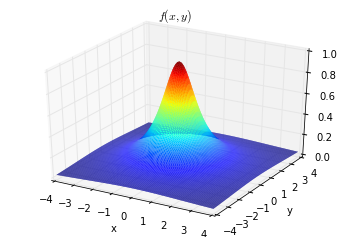

In [4]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, runge, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$Runge(x,y)$')

This next graph is created by the 2D interpolating function $p_6(x,y)$. This function used 7 interpolating points uniformly spread acrosss the plane to create the interpolating polynomial and graphs that polynomial over the grid $(x, y) \in [-4,4] \times [-4,4]$

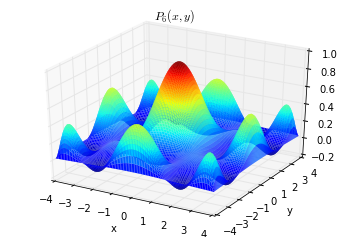

In [6]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p6, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$P_6(x,y)$')

Our third graph uses the same process above but with 25 interpolating points uniformly spread over the grid $(x, y) \in [-4,4] \times [-4,4]$. This teqnique creates the least accurate graph because of the huge osilation at the end points and the fact that this function is not easily interpolated using uniform points.

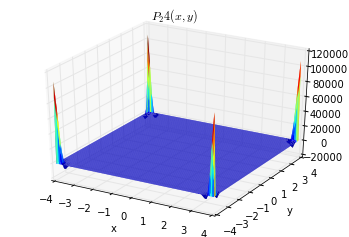

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p24, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$P_24(x,y)$')

The fourth graph is when I start using the Chebyshev points. These point help better interpolate functions that are hard using uniform points. Imediatly you can see the diffrence. Of the other two graphs, this one looks the most like our Runge graph. It however still is not as good because the peak of this graph is only around 0.6 so you can tell that there is some error. This graph was created with 7 interpolating points created with the function $$x_i = L\cos\frac{(2i +1)\pi}{2m*2}$$ where $L = [-L, L]$ and $i = 0, ..., m$. This maps the interpolating point around a circle.

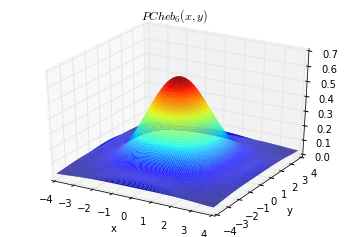

In [8]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p6Cheb, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$PCheb_6(x,y)$')

The final graph is the 25 point Chebyshev interpolating polynomial. This one is the most accurate with the graph being very visually similar to the original function.

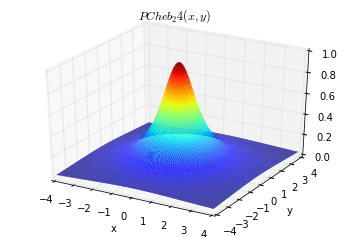

In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(b, a)
surf = ax.plot_surface(X, Y, p24Cheb, rstride=1, cstride=1, linewidth=0, cmap=plt.cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('$PCheb_24(x,y)$')

Now we get to the error graphs. In this graph you can see the center, where $p_6(x,y)$ was somewhat accurate has only some slight error. However, the error has huge peaks where $p_6(x,y)$ ocsilates and where $f(x,y)$ does not

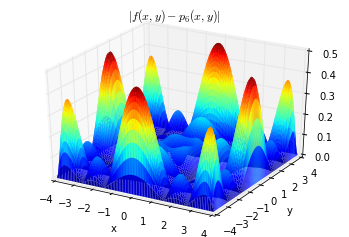

In [15]:
e6 = abs(runge-p6)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e6, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_6(x,y)|$')

Not much changes from the $p_{24}(x,y)$ graph and its error graph. They are both still huge at the corrners of the grid.

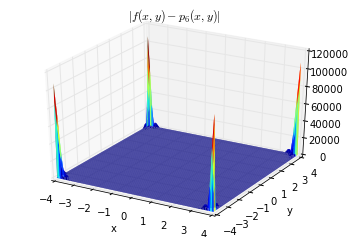

In [16]:
e24 = abs(runge-p24)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e24, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_6(x,y)|$')

Once we analize the error for the Chebyshev interpolating polynomial we can see how much better the interpolating polynomial fits the graph. The only large error here is where the cone peaks on $f(x,y)$ and that error rapidly decreases as $x$ and $y$ move away from 0

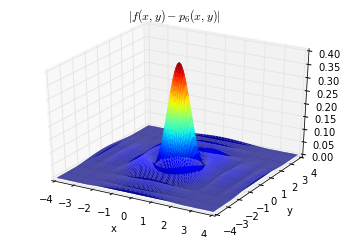

In [17]:
e6Cheb = abs(runge-p6Cheb)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e6Cheb, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_6(x,y)|$')

Finally, the error for the 25 point Chebyshev interpolating polynomial. The error in this polynomial is very small considering the other graphs. This graph maxes out around 0.006 at its highest point and decreases very quickly.

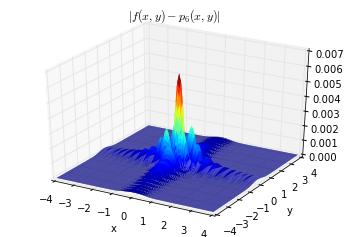

In [18]:
e24Cheb = abs(runge-p24Cheb)
fig = figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, e24Cheb, rstride=1, cstride=1, linewidth=0, cmap=cm.jet)
ax.set_xlabel('x')
ax.set_ylabel('y')
title('$|f(x,y) - p_6(x,y)|$')

In [19]:
e6norm = sqrt(sum(sum(e6**2))/size(e6))
e24norm = sqrt(sum(sum(e24**2))/size(e24))
eCheb6norm = sqrt(sum(sum(e6Cheb**2))/size(e6Cheb))
eCheb24norm = sqrt(sum(sum(e24Cheb**2))/size(e24Cheb))

print ('||e6|| = ', e6norm)

print ('||e24|| = ', e24norm)

print ('||e6Cheb|| = ', eCheb6norm)

print ('||eCheb24|| = ', eCheb24norm)

||e6|| =  0.141951275763
||e24|| =  3340.29450949
||e6Cheb|| =  0.0440913843674
||eCheb24|| =  0.000403442073422


From the error norms, I can rank the different techniques used. To begin with, the interpolating polynomial created from 25 Chebyshev points creates the most acurate graph followed by the polynomial with 7 Chebyshev points. As expected from the graphs, the uniformly choosen points for the interpolating polynomials come in last with the 7 uniform points oscilating but still having a sub .2 error. Finally, the 25 uniform points comes in dead last with a huge error associated with its interpolating polynomial